- Joel Konitzer
- 4/2/2022
- Week 4 / Hypothesis Testing
- Data Analytics

I. Introduction:
The purpose of this analysis was to demonstrate hypothesis testing using toothgrowth.csv dataset. The data is divided into two supplement categories and three dose categories. The aim was to assess if tooth growth differed between supplement groups and what supplement was associated with greater tooth length. Before hypothesis testing, the dataset quality was assessed using graphical and statistical tests to ensure adequate results.

*II. Methods & Code **III. Results/Output ***IV. Analysis of Results

In [40]:
# some of the common imports that we will need
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import pandas as pd

%matplotlib inline
sns.set()  

In [32]:
df = pd.read_csv('ToothGrowth.csv').drop('Unnamed: 0', axis=1)

In [33]:
#Preview dataset
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


In [34]:
#Create two value pairs from df to identify the datatypes and null values
def info(df):
    null_ = df.isna().any()
    dtypes = df.dtypes
    info = pd.concat([null_,dtypes], axis=1,keys=['Null','type'])
    print(info)

#Use len() function to view total df row count and shape to view row and column count
print("===========================================================================================================")
print("Number of rows:", len(df))
print("Shape:", df.shape)
print("===========================================================================================================")
print("Column quality:")
info(df)
print("===========================================================================================================")
print("Dataset summary statistics:")
df.describe().T

Number of rows: 60
Shape: (60, 3)
Column quality:
       Null     type
len   False  float64
supp  False   object
dose  False  float64
Dataset summary statistics:


,count,mean,std,min,25%,50%,75%,max
len,60.0,18.813333,7.649315,4.2,13.075,19.25,25.275,33.9
dose,60.0,1.166667,0.628872,0.5,0.500,1.00,2.000,2.0


1. Graphically describe the dataset. 

In [35]:
#Create separate dataframes for each delivery mehtod
sample_oj = df[df['supp'] == 'OJ'].copy()
sample_vc = df[df['supp'] == 'VC'].copy()

[Text(0.5, 1.0, 'VC supplement test group')]

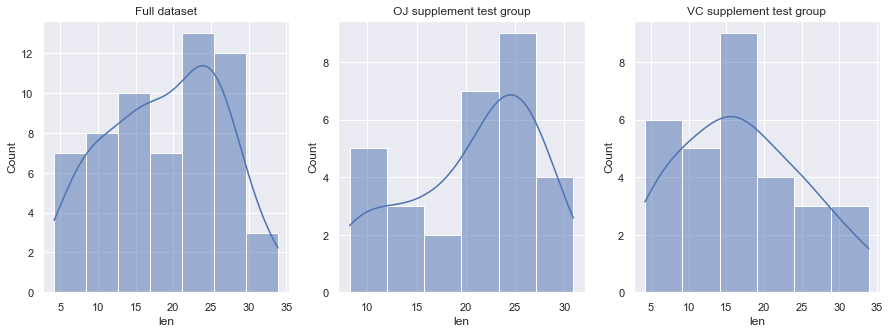

In [36]:
#Box plot to view outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# histogram plot - the kde argument add
sns.histplot(ax=axes[0], x=df.len, kde=True).set(title='Full dataset')
sns.histplot(ax=axes[1], x=sample_oj.len, kde=True).set(title='OJ supplement test group')
sns.histplot(ax=axes[2], x=sample_vc.len, kde=True).set(title='VC supplement test group')

The three histograms above display separate views of our original dataset and for each plot the y-axis represents the count of recorded tooth lengths seen on the x-axis. The leftmost plot represents the entire dataset, and the middle plot represents the OJ supplement test group; both are skewed slightly left. The rightmost plot then represents the VC supplement test group and is skewed slightly right.

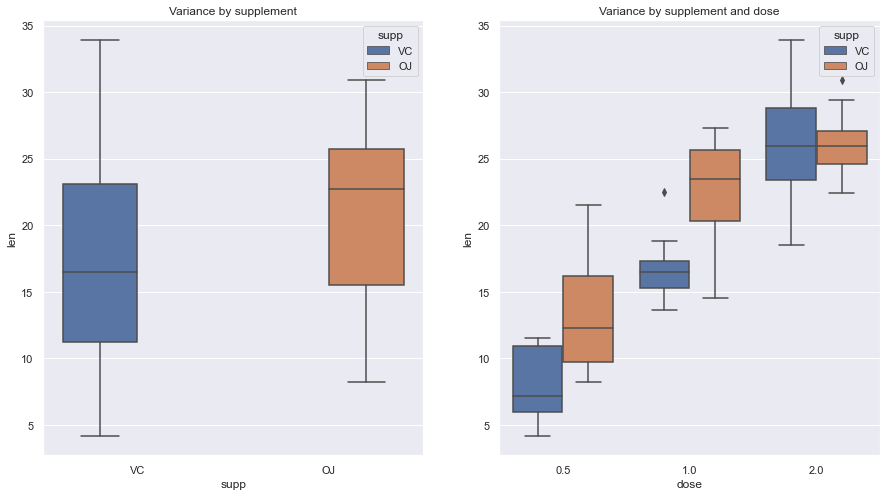

In [37]:
#Box plot to view outliers
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.boxplot(ax=axes[0], data=df, x=df['supp'], y = df.len, hue = 'supp').set(title='Variance by supplement')
sns.boxplot(ax=axes[1], data=df, x=df['dose'], y = df.len, hue = 'supp').set(title='Variance by supplement and dose')
plt.show()

The histograms above show us the variance of lengths across our dataset. The left plot represents the overall variance of length values for each supplement group and we see that there is appears to be more variance with the VC group. The right plot shows the variance for each dose & supplement group and implies that with increasing dose volume results in increaed length and reduced variance.

2. Check of data normality, using both methods 

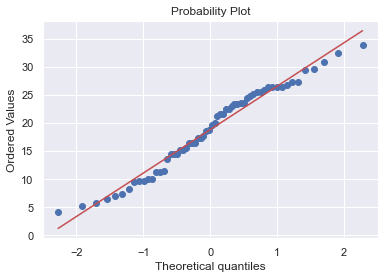

In [41]:
#Graphically checking normality using probplot
stats.probplot(df.len, plot=plt)
plt.show()

Checking the data normality shows that it follows a more uniform distribution rather than the normal distribution that we would hope to see.  

In [42]:
#Using the Shapiro-Wilk Test to statistically check for normality
from scipy.stats import shapiro

# normality test
stat, p = shapiro(df.len)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks normally distributed')
else:
    print('Sample does not look normally distributed')

Statistics=0.967, p=0.109
Sample looks normally distributed


Using the Shapiro-Wilk test to statistically check for normality tells us that our dataset does follow a normal distribution.

3. Defined a null and alternative hypothesis (Ho and Ha) for the dataset

Consuming Vitamin C from a natural source such as fruit promotes tooth growth more than consuming its raw form.
- H0: mean difference between OJ & VC is 0
- H1: mean difference between OJ & VC is not 0

4. Hypothesis testing

In [43]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

#paired t-test
ttest,pval = stats.ttest_rel(sample_vc.len, sample_oj.len)
print(f'p-value: {pval}')

# eval p-value
if pval < 0.05:    # alpha value is 0.05 or 5%
   print('Reject null hypothesis')
else:
  print('Accept null hypothesis')

p-value: 0.0025498424133060605
Reject null hypothesis


The initial hypothesis aimed to determine if there was a significant mean difference in tooth length between supplement groups. To do this, we used the paired sample T-test because it allows us to compare the mean of each group and is recommended for smaller datasets over the two sample z-test recommended for larger datasets.  
The findings from the hypothesis show a very small p-value of 0.0025 or 0.03%

5. Conclusion based on your analysis

The test shows that we can reject our null hypothesis because we obtained a very small p-value. The p-value obtained is smaller than our set level of significance (alpha) of 5%, which means that the likelihood of us observing an extreme value is higher than it occurring by chance. 

6. Refine your initial hypothesis and repeat steps 3 through 5

Orange juice supplement has a lesser effect on tooth length than ascorbic acid supplement 
- H0: OJ <= VC
- H1: OJ > VC

In [46]:
#paired t-test
ttest,pval = stats.ttest_rel(sample_oj.len, sample_vc.len, alternative='greater')
print(f'p-value: {pval}')

# eval p-value
if pval < 0.05:    # alpha value is 0.05 or 5%
   print('Reject null hypothesis')
else:
  print('Accept null hypothesis')

p-value: 0.0012749212066530302
Reject null hypothesis


Diving deeper into our analysis, the following hypothesis test aimed to find if the observed tooth length was lower in the OJ test group than in the VC test group. The results show a p-value of 0.0012 or 0.01% greater than our defined alpha of 5%. This suggests that the null hypothesis can be rejected; the observed tooth length in the OJ test group is greater than that of the VC group.

V. Conclusion This analysis demonstrated the power of using statistical concepts to explain and validate data observations and assumptions. The frequency distribution and probability plot visuals show that our dataset conforms to a more uniform distribution than a normal distribution, and the boxplot visuals further support that. The boxplot visuals show the dataset has high variance and contains multiple outliers, which is characteristic of datasets that follow a more uniform distribution. However, graphical representations only give us clues about what may be, so it's important to quantify. The statistical test of normality showed that our dataset does follow a normal distribution despite our dataset appearing to follow a uniform distribution. 
The hypothesis test I employed aimed to determine if each supplement group's mean sample size was different. The results showed a difference between supplement groups, which led me to construct the following hypothesis to determine what supplement group was responsible for increased tooth length. The results supported that OJ is a better supplement to promote tooth length than VC; the p-value was exceptionally small, 0.0012, compared to our alpha of 0.05.  
Future studies should use control data to determine if these supplements are causing any deleterious effects on tooth health. 


VI. Sources
- Korstanje, J. (2020, February 17). 6 ways to test for a normal distribution - which one to use? Medium. Retrieved April 3, 2022, from https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93 
- Menon, P. (2017, August 5). Data Science Simplified Part 3: Hypothesis testing. Medium. Retrieved April 3, 2022, from https://towardsdatascience.com/data-science-simplified-hypothesis-testing-56e180ef2f71 
- Sarkar, T. (2021, August 19). Demystifying hypothesis testing with simple python examples. Medium. Retrieved April 3, 2022, from https://towardsdatascience.com/demystifying-hypothesis-testing-with-simple-python-examples-4997ad3c5294 
- Seaborn.catplot¶. seaborn.catplot - seaborn 0.11.2 documentation. (n.d.). Retrieved April 3, 2022, from https://seaborn.pydata.org/generated/seaborn.catplot.html?highlight=title 